# API Funcional

## 1. Dataset

In [2]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

65536/57026 [==================================] - 0s 0us/step


In [3]:
x_train.shape

(404, 13)

## 2. Arquitecturas personalizadas

In [10]:
from keras import layers, Model
from tensorflow.keras.utils import plot_model

### Modelo 1

In [6]:
input1 = layers.Input(shape=x_train.shape[1:])
hidden1 = layers.Dense(32, activation='relu') (input1)
hidden2 = layers.Dense(32, activation='relu') (hidden1)
hidden3 = layers.Dense(16, activation='relu') (hidden2)
concat1 = layers.Concatenate()([input1, hidden3])
output = layers.Dense(1) (concat1)

In [8]:
model = Model(inputs=[input1],outputs=[output])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           448         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           528         ['dense_1[0][0]']                
                                                                                              

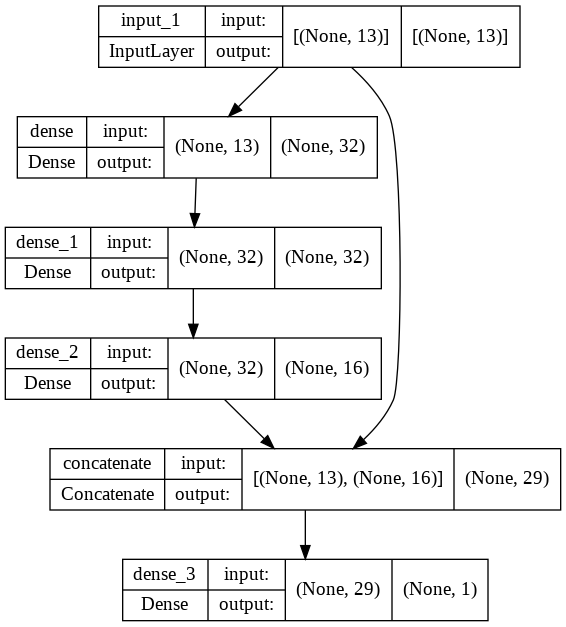

In [11]:
plot_model(model,to_file='model1.png',show_shapes=True)

In [12]:
model.compile('rmsprop','mean_squared_error',['mse'])

In [13]:
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=0)

In [14]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 29.0403 - mse: 29.0403


[29.0402889251709, 29.0402889251709]

## Modelo 2

In [16]:
input1 = layers.Input(shape=x_train.shape[1:])
hidden11 = layers.Dense(32, activation='relu') (input1)
hidden12 = layers.Dense(32, activation='relu') (hidden11)
hidden13 = layers.Dense(16, activation='relu') (hidden12)
input2 = layers.Input(shape=5)
hidden22 = layers.Dense(32, activation='relu') (input2)
hidden23 = layers.Dense(16, activation='relu') (hidden22)
concat1 = layers.Concatenate()([hidden13, hidden23])
hidden4 = layers.Dense(8, activation='relu') (concat1)
output = layers.Dense(1) (hidden4)

In [17]:
model = Model(inputs=[input1, input2], outputs=[output])

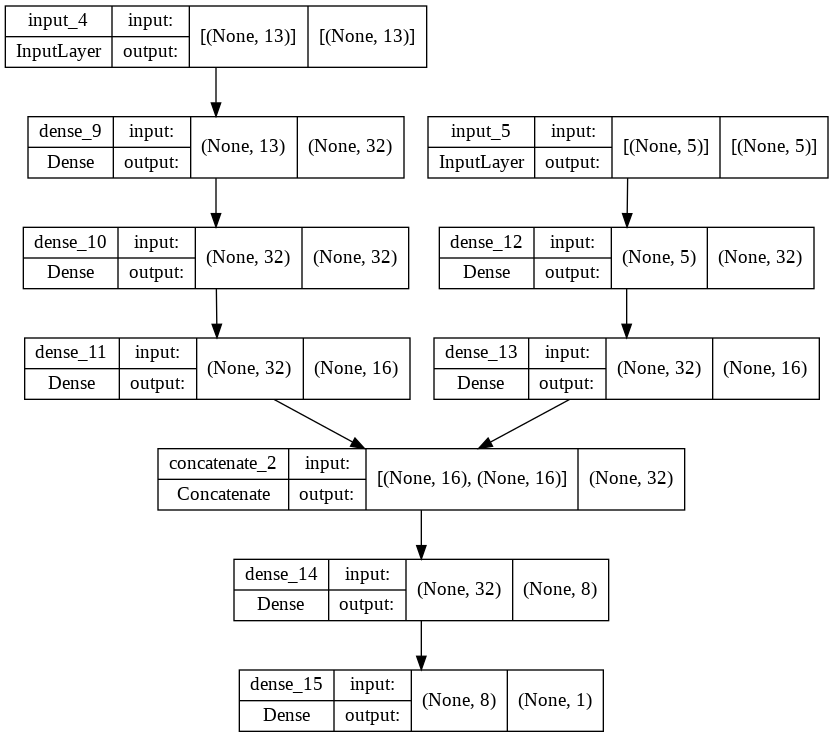

In [18]:
plot_model(model, to_file='model2.png', show_shapes=True)

In [23]:
x_train_A, x_train_B = x_train, x_train[:,:5]
x_test_A, x_test_B = x_test, x_test[:,:5]

In [20]:
# Compilamos
model.compile('adam','mean_squared_error',['mae'])

In [29]:
# Entrenamiento
history = model.fit((x_train_A, x_train_B),y_train, batch_size=64, epochs=60,
          validation_data = ((x_test_A, x_test_B), y_test), verbose=0)

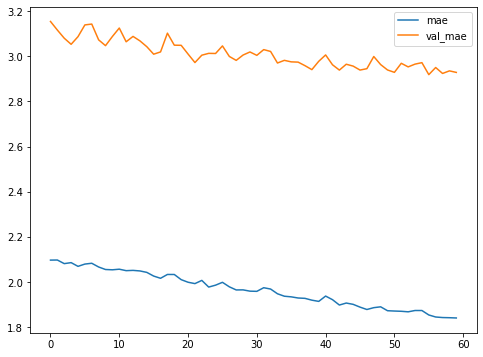

In [30]:
import pandas as pd
pd.DataFrame(history.history)[['mae','val_mae']].plot(figsize=(8,6))

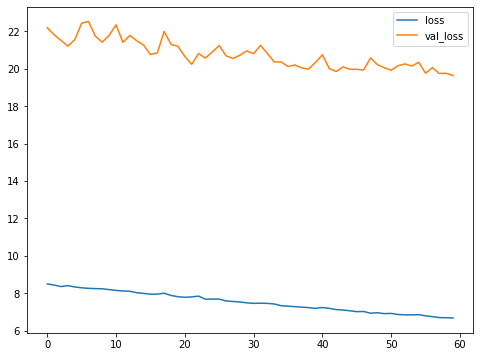

In [31]:
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8,6))

# Subclassing API

In [49]:
import keras
class MyModel(keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = layers.Dense(32, activation='relu')
    self.hidden2 = layers.Dense(20, activation='relu')
    self.hidden3 = layers.Dense(32, activation='relu')
    self.hidden4 = layers.Dense(5, activation='relu')
    self.hidden5 = layers.Dense(1)
    self.concat = layers.Concatenate()
    pass
  
  def call(self, inputs):
    input1, input2 = inputs
    hidden1 = self.hidden1(input1)
    hidden2 = self.hidden2(hidden1)
    hidden3 = self.hidden3(input2)
    hidden4 = self.hidden4(hidden3)
    concat = self.concat([hidden2, hidden4])
    hidden5 = self.hidden5(concat)
    # Salidas
    #return hidden4, hidden5
    return hidden5

In [50]:
model = MyModel()

In [51]:
model.compile('adam','mean_squared_error')

In [52]:
model.fit((x_train_A, x_train_B), y_train, epochs=20, batch_size=64)

Epoch 1/20
7/7 [==============================] - 0s 2ms/step - loss: 596.1268
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 585.0617
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 573.9041
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 562.5717
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 550.0687
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 535.6886
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 519.6368
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 500.4505
Epoch 9/20
7/7 [==============================] - 0s 2ms/step - loss: 478.7584
Epoch 10/20
7/7 [==============================] - 0s 2ms/step - loss: 453.5258
Epoch 11/20
7/7 [==============================] - 0s 2ms/step - loss: 425.1183
Epoch 12/20
7/7 [==============================] - 0s 3ms/step - loss: 393.3484
Epoch 13/20
7/7 [==============================] 

In [53]:
model.summary()

Model: "my_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            multiple                  448       
                                                                 
 dense_32 (Dense)            multiple                  660       
                                                                 
 dense_33 (Dense)            multiple                  192       
                                                                 
 dense_34 (Dense)            multiple                  165       
                                                                 
 dense_35 (Dense)            multiple                  26        
                                                                 
 concatenate_6 (Concatenate)  multiple                 0         
                                                                 
Total params: 1,491
Trainable params: 1,491
Non-trainabl

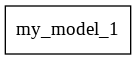

In [42]:
plot_model(model, show_shapes=True)